In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from OptionPlayTranslator import *

In [2]:

# srcDataFrame = pd.read_csv('optionsDX/aapl_2022/aapl_eod_2022q4-86egbl/aapl_eod_202210.txt')
srcDataFrame = pd.read_csv('tslaReduced.csv')

df = pd.DataFrame(srcDataFrame)
df.columns = df.columns.str.strip()

/var/folders/p_/r9zh86p106b8yh2ly8zzjbw00000gn/T/ipykernel_36411/155347403.py:2: DtypeWarning: Columns (4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  srcDataFrame = pd.read_csv('tslaReduced.csv')


In [3]:
dayGroups = df.groupby('[QUOTE_DATE]')

In [4]:

opt = OPT('TSLA', dayGroups)
# print(opt.ticker)
# opt.find_plays(' 2019-10-01', ' 2020-01-16',200)

In [5]:
predictions = pd.read_csv('tsla_predictions.csv')
x = predictions.iloc[30]

# PLOT ALL OUTCOMES

In [6]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',100, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-05
[DTE]                        1.0
[C_LAST]                   10.66
[C_BID]                    10.14
[C_ASK]                     10.8
[STRIKE]                   625.0
[P_BID]                    14.25
[P_ASK]                    14.59
[P_LAST]                   14.53
Name: 1646482, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-12
[DTE]                        8.0
[C_LAST]                   28.04
[C_BID]                    28.24
[C_ASK]                    28.65
[STRIKE]                   625.0
[P_BID]                    31.61
[P_ASK]                     32.0
[P_LAST]                    32.9
Name: 1646657, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-12
[DTE]                        8.0
[C_LAST]                   28.04
[C_BI

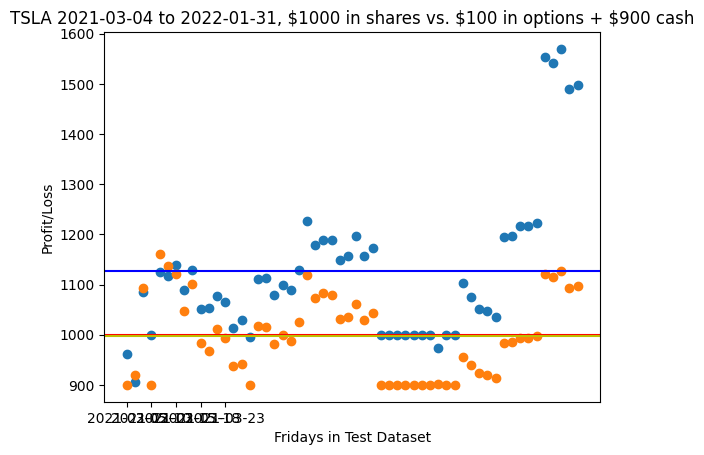

In [7]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $100 in options + $900 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=np.mean(sharePnL), color='b', linestyle='-', label='Shares Mean')
plt.axhline(y=np.mean(optionPnL), color='y', linestyle='-', label='Options Mean')

In [8]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',500, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])


spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-05
[DTE]                        1.0
[C_LAST]                   10.66
[C_BID]                    10.14
[C_ASK]                     10.8
[STRIKE]                   625.0
[P_BID]                    14.25
[P_ASK]                    14.59
[P_LAST]                   14.53
Name: 1646482, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-12
[DTE]                        8.0
[C_LAST]                   28.04
[C_BID]                    28.24
[C_ASK]                    28.65
[STRIKE]                   625.0
[P_BID]                    31.61
[P_ASK]                     32.0
[P_LAST]                    32.9
Name: 1646657, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-12
[DTE]                        8.0
[C_LAST]                   28.04
[C_BI

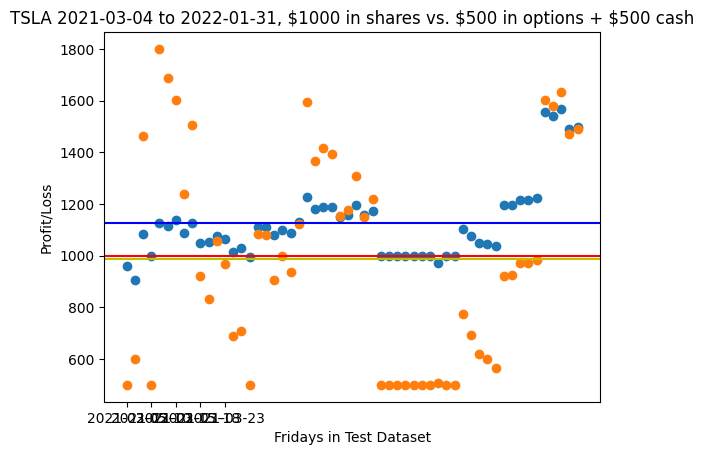

In [9]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $500 in options + $500 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=np.mean(sharePnL), color='b', linestyle='-', label='Shares Mean')
plt.axhline(y=np.mean(optionPnL), color='y', linestyle='-', label='Options Mean')

In [21]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_returns = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_returns.append(play[3])

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-05
[DTE]                        1.0
[C_LAST]                   10.66
[C_BID]                    10.14
[C_ASK]                     10.8
[STRIKE]                   625.0
[P_BID]                    14.25
[P_ASK]                    14.59
[P_LAST]                   14.53
Name: 1646482, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-12
[DTE]                        8.0
[C_LAST]                   28.04
[C_BID]                    28.24
[C_ASK]                    28.65
[STRIKE]                   625.0
[P_BID]                    31.61
[P_ASK]                     32.0
[P_LAST]                    32.9
Name: 1646657, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-19
[DTE]                      14.96
[C_LAST]                   37.95
[C_BI

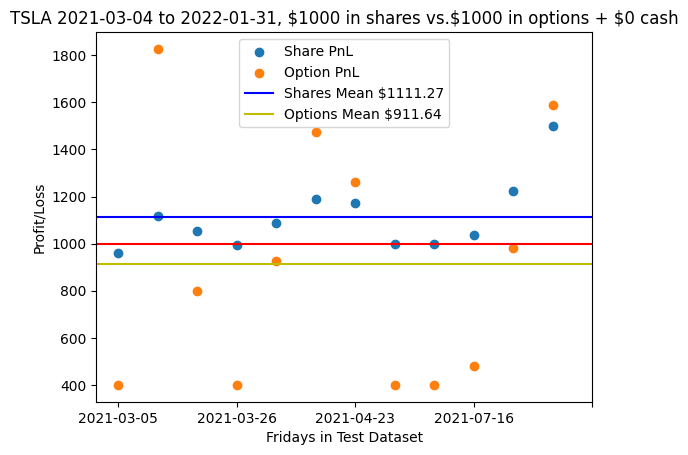

In [26]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs.$1000 in options + $0 cash')
plt.xticks(range(0,13,3))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
shareMean = round((np.mean(sharePnL)),2)
optionMean = round((np.mean(optionPnL)),2)
plt.axhline(y=shareMean, color='b', linestyle='-', label=f'Shares Mean ${shareMean}')
plt.axhline(y=optionMean, color='y', linestyle='-', label=f'Options Mean ${optionMean}')
plt.legend()

# PICKING SHARES OR OPTIONS BASED ON PREDICTED RETURNS

In [23]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_PnL_shares = []
predicted_PnL_options = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',600, False, False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_PnL_shares.append(play[3])
            predicted_PnL_options.append(play[4])

choose_higher_predicted = []
choose_higher_actual = []

for i in range(len(predicted_PnL_shares)):
    if ((predicted_PnL_shares[i] < 1000) and (predicted_PnL_options[i] < 1000)):
        choose_higher_predicted.append(1000)
        choose_higher_actual.append(1000)
    elif predicted_PnL_shares[i] > predicted_PnL_options[i]:
        choose_higher_predicted.append(predicted_PnL_shares[i])
        choose_higher_actual.append(sharePnL[i])
    else: # options predicted to do better
        choose_higher_predicted.append(predicted_PnL_options[i])
        choose_higher_actual.append(optionPnL[i])



spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-05
[DTE]                        1.0
[C_LAST]                   10.66
[C_BID]                    10.14
[C_ASK]                     10.8
[STRIKE]                   625.0
[P_BID]                    14.25
[P_ASK]                    14.59
[P_LAST]                   14.53
Name: 1646482, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-12
[DTE]                        8.0
[C_LAST]                   28.04
[C_BID]                    28.24
[C_ASK]                    28.65
[STRIKE]                   625.0
[P_BID]                    31.61
[P_ASK]                     32.0
[P_LAST]                    32.9
Name: 1646657, dtype: object 

spot:  621.65
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-19
[DTE]                      14.96
[C_LAST]                   37.95
[C_BI

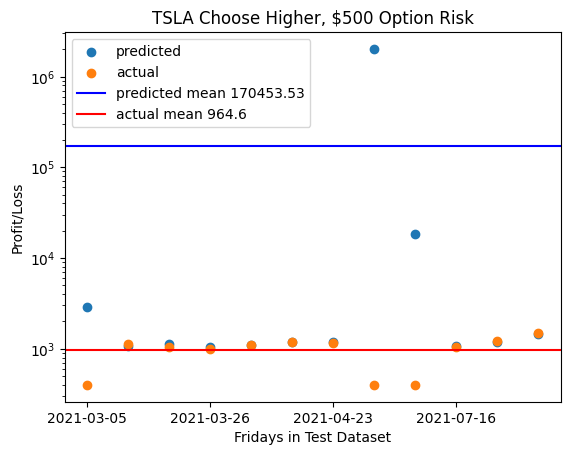

In [27]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted')
plt.scatter(pred_dates, choose_higher_actual, label='actual')
plt.title('TSLA Choose Higher, $500 Option Risk')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
# y logaritmic scale
plt.yscale('log')
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='r', linestyle='-', label = f'actual mean ${actual_mean}')
plt.legend()

In [25]:
choose_higher_predicted 
# choose_higher_actual

[2851.736280399997,
 1061.17,
 1125.4,
 1055.63,
 1102.01,
 1175.17,
 1176.48,
 2013804.0625,
 18350.626,
 1078.76,
 1198.66,
 1462.62]